In [ ]:
!pip install opendatasets --upgrade --quiet    # upgrade quietly, don't show output

In [4]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [5]:
%cd /content/gdrive/MyDrive/asl_dataset/


/content/gdrive/MyDrive/asl_dataset


In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od     # use od as alias for opendatasets
dataset_url = 'https://www.kaggle.com/grassknoted/asl-alphabet'
od.download(dataset_url)


In [6]:
import os
# Check data_dir_train directory contents
data_dir_train = './asl-alphabet/asl_alphabet_train/asl_alphabet_train'

os.listdir(data_dir_train)  # list of data_dir_train files in arbitrary order

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [7]:
data_dir_test = './asl-alphabet/asl_alphabet_test/asl_alphabet_test'
os.listdir('./asl-alphabet')

['asl_alphabet_test', 'asl_alphabet_train']

In [8]:
classes_train = os.listdir(data_dir_train)
classes_test = os.listdir(data_dir_test)
print(classes_train)        # list: classes_train, ['B', 'K', 'Y', 'V', 'O', ...] (29 items total)
print(classes_test)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
['A_test.jpg', 'B_test.jpg', 'C_test.jpg', 'D_test.jpg', 'E_test.jpg', 'F_test.jpg', 'G_test.jpg', 'H_test.jpg', 'I_test.jpg', 'J_test.jpg', 'K_test.jpg', 'L_test.jpg', 'M_test.jpg', 'N_test.jpg', 'O_test.jpg', 'P_test.jpg', 'Q_test.jpg', 'R_test.jpg', 'S_test.jpg', 'T_test.jpg', 'U_test.jpg', 'V_test.jpg', 'W_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'Z_test.jpg', 'nothing_test.jpg', 'space_test.jpg']


In [9]:
# Count number of labels per class_train
for cls in os.listdir(data_dir_train):
  print(cls, ':', len(os.listdir(data_dir_train  + '/' + cls)))

A : 3000
B : 3000
C : 3000
D : 3000
E : 3000
F : 3000
G : 3000
H : 3000
I : 3000
J : 3000
K : 3000
L : 3000
M : 3000
N : 3000
O : 3000
P : 3000
Q : 3000
R : 3000
S : 3000
T : 3000
U : 3000
V : 3000
W : 3000
X : 3000
Y : 3000
Z : 3000
del : 3000
nothing : 3000
space : 3000


This dataset is equally balanced because each of the classes has the same number of members.

In [10]:
# Count number of files per class_test
for cls in os.listdir(data_dir_test):
  print(cls, ':', len(os.listdir(data_dir_test)))

A_test.jpg : 28
B_test.jpg : 28
C_test.jpg : 28
D_test.jpg : 28
E_test.jpg : 28
F_test.jpg : 28
G_test.jpg : 28
H_test.jpg : 28
I_test.jpg : 28
J_test.jpg : 28
K_test.jpg : 28
L_test.jpg : 28
M_test.jpg : 28
N_test.jpg : 28
O_test.jpg : 28
P_test.jpg : 28
Q_test.jpg : 28
R_test.jpg : 28
S_test.jpg : 28
T_test.jpg : 28
U_test.jpg : 28
V_test.jpg : 28
W_test.jpg : 28
X_test.jpg : 28
Y_test.jpg : 28
Z_test.jpg : 28
nothing_test.jpg : 28
space_test.jpg : 28


In [ ]:
print(len(os.listdir(data_dir_test)))

28


In [ ]:
# assign train image class folders to a main folder named classes
classes = os.listdir("./asl-alphabet/asl_alphabet_train/asl_alphabet_train")
print(classes)

['R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']


In [ ]:
# assign test image class folders to a main folder named classes_test
classes_test = os.listdir("./asl-alphabet/asl_alphabet_test/asl_alphabet_test")  
print(classes_test)  # Note: 'del_test.jpg" not in file

['F_test.jpg', 'G_test.jpg', 'L_test.jpg', 'M_test.jpg', 'R_test.jpg', 'S_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'U_test.jpg', 'T_test.jpg', 'A_test.jpg', 'K_test.jpg', 'J_test.jpg', 'Z_test.jpg', 'nothing_test.jpg', 'Q_test.jpg', 'P_test.jpg', 'space_test.jpg', 'O_test.jpg', 'N_test.jpg', 'E_test.jpg', 'D_test.jpg', 'H_test.jpg', 'I_test.jpg', 'B_test.jpg', 'C_test.jpg', 'V_test.jpg', 'W_test.jpg']


In [11]:
from torchvision.datasets import ImageFolder

# Assign dataset to point to data_dir
data_dir = data_dir_train
dataset = ImageFolder(data_dir)   # ImageFolder: dataset, ImageFolder with 87028 items

## **Exploratory Data Analysis (EDA)**

In [ ]:
# Look at a single image from the dataset
dataset[7000]

(<PIL.Image.Image image mode=RGB size=200x200>, 2)

The image dataset[7000] contains a `PIL image` and a `number, '2'`.  The `number, '2'`, represents the class this image belongs to.  There are 29 classes, ranging from 0 to 28, in the dataset.  Each class is wrapped under a folder named with the class number.  Each folder contains 3000 images.  `Folder 0` contains images 0-299, `folder 1` contains images 300-599, `folder 2` contains images 600-899 and so on.  Thus, `image 7000` would be in `folder 2` and the corresponding class would be `C`.  To see the class this image belongs to, look at `dataset.classes` and use the folder number which is `2` as the index as follows:  `dataset.classes[2]`

In [15]:
# Check the length of the Dataset
print("dataset:  ", str(len(dataset)) + " files")
# Number of classes/labels in the dataset
print("len(dataset.classes):  ", str(len(dataset.classes)) + " classes")     

dataset:   87000 files
len(dataset.classes):   29 classes


In [14]:
idx2class = {v: k for k, v in dataset.class_to_idx.items()}   # dict of index mapping label in dataset, idx: label
idx2class

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z',
 26: 'del',
 27: 'nothing',
 28: 'space'}

# View the Distribution of the 29 distinct Classes in the Dataset to determine how balanced the Dataset is.

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [12]:
import matplotlib.pyplot as plt


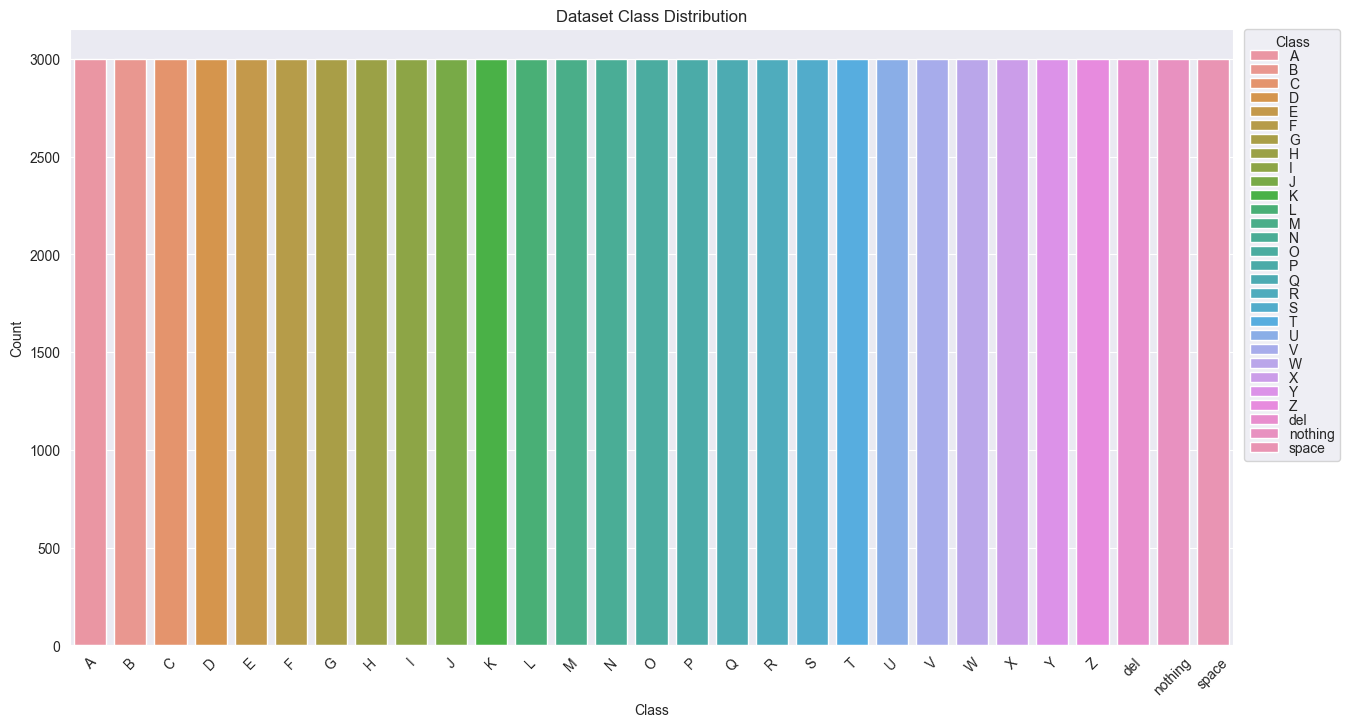

In [ ]:
# Look at the Dataset images using MatPlotLib

import matplotlib.pyplot as plt

# Plot image in this Jupyter notebook (frontend)
%matplotlib inline    
plt.rcParams["axes.grid"] = False    # display without gridlines

import seaborn as sns
sns.set_style('darkgrid')

import pandas as pd

def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    for _, label_id in dataset_obj:
        label = idx2class[label_id]
        count_dict[label] += 1
    return count_dict

def plot_from_dict(dict_obj, plot_title, **kwargs):
    return sns.barplot(data = pd.DataFrame.from_dict([dict_obj]).melt(),
                       x = "variable",
                       y = "value",
                       dodge=False,
                       hue="variable",
                       **kwargs).set_title(plot_title)

plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
plot_from_dict(get_class_distribution(dataset),
               plot_title="Dataset Class Distribution")

plt.xlabel('Class')
plt.ylabel('Count')

# Design Legend

plt.legend(labelspacing=0,
           title='Class',
           frameon=True,
           loc='upper left',
           bbox_to_anchor=(1.01, 1),    # place anchor on the right (i.e. 1.01 on the x-axis) and vertically centered (1 on the y-axis)
           borderaxespad=0)

plt.show()    # Display plot

NameError: ignored

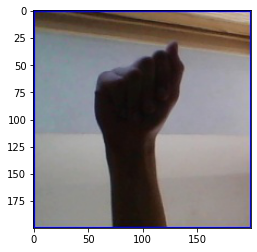

In [13]:
# Look at one element from the dataset
img, label = dataset[0]   # select the img and label pair to view
plt.rcParams["axes.grid"] = False    # display without gridlines
plt.imshow(img)  # display the image
print('label:  ' + str(label), '\nClass:  ' + idx2class[label])

label:  0 
Class:  A


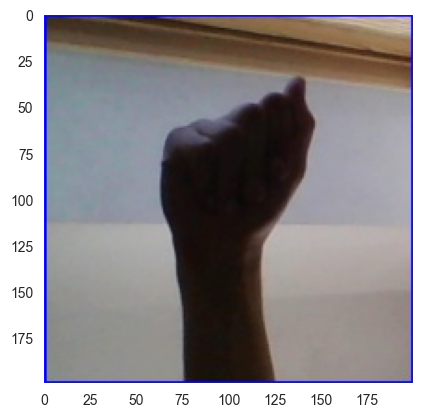

In [ ]:
# Look at one element from the dataset
img, label = dataset[1]   # select the img and label pair to view
plt.imshow(img)  # display the image
print('label:  ' + str(label), '\nClass:  ' + idx2class[label])

label:  10
dataset[31419]:  (<PIL.Image.Image image mode=RGB size=200x200 at 0x164DCD600>, 10)
dataset[31419][0]:  <PIL.Image.Image image mode=RGB size=200x200 at 0x164DCD5D0>
dataset[31419][1]:  10
idx2class[label]:  K
Numeric Index:  10 
Class:   K


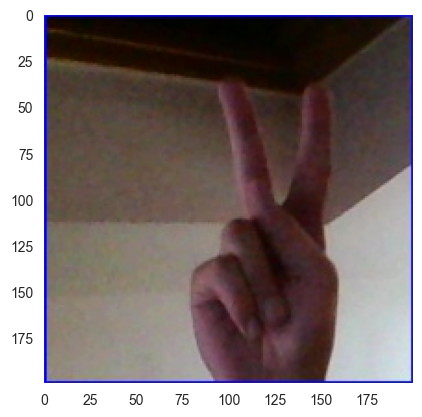

In [ ]:
# Look at one element from the dataset
img, label = dataset[31419]   # select the corresponding img and label
plt.imshow(img)
print("label:  " + str(label))
dataset[7000]
print("dataset[31419]:  " + str(dataset[31419]))
print("dataset[31419][0]:  " + str(dataset[31419][0]))
print("dataset[31419][1]:  " + str(dataset[31419][1]))
print("idx2class[label]:  " + idx2class[label])  # dict: idx2class, {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', ...}
                  # (29 items total), int: label 10
print('Numeric Index:  ' + str(label), '\nClass:   ' + idx2class[label])

## Prepare the Dataset for Training


### Redefine the dataset by converting the PIL (Python Imaging Library image format) images to PyTorch Tensors. 

In [18]:
import torchvision.transforms as tt
# Set size of image in pixels
img_size = 64

# point ImageFolder to data_dir
dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(img_size),        # Apply multiple transforms together 
                                            tt.RandomCrop(img_size),    # Resize all images to be the same width and height
                                            tt.ToTensor()]))            # Convert PIL (Python Imaging Library image format) images to tensors

Numeric Index:  0 
Label/Letter:   A


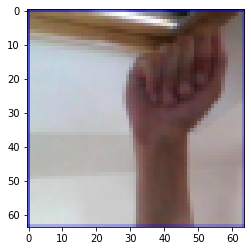

In [19]:
# Look at one element from the dataset
img, label = dataset[120]   # select the corresponding img and label
plt.imshow(img.permute((1, 2, 0)))    # reshape from (C, H, W) for Matplotlib to (H, W, C) for PyTorch Tensors
print('Numeric Index:  ' + str(label), '\nLabel/Letter:   ' + idx2class[label])

## Split the Dataset into Validation Set and Train Set

In [20]:
import torch

random_seed = 33
torch.manual_seed(random_seed);

val_pct = 0.1   # validation percentage
val_size = int(val_pct * len(dataset)) # validation size

train_size = len(dataset) - val_size      # train size
train_size, val_size

(78300, 8700)

In [21]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(valid_ds)

(78300, 8700)

## Create Data Loaders and Set Batch Size


In [22]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

valid_dl = DataLoader(valid_ds,
                    batch_size*2,
                    num_workers=4,
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [23]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break  

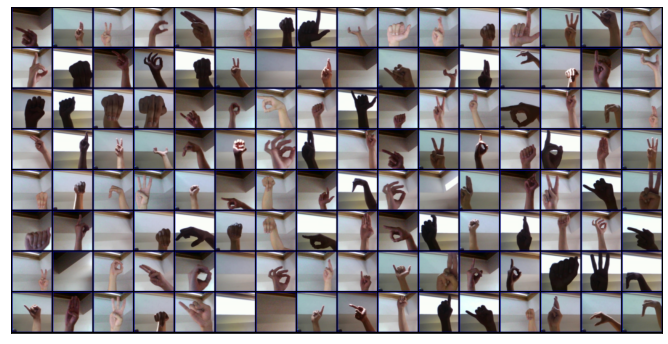

In [24]:
# View a batch
show_batch(train_dl)

In [25]:
import torch


## **Utility Functions & Classes**
### **GPU Utilities**

In [26]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [27]:
device = get_default_device()

In [28]:
device

device(type='cuda')

In [29]:
img, label = dataset[0]   # Get an image tensor out of the dataset
img

tensor([[[0.0549, 0.0980, 0.1098,  ..., 0.3333, 0.3333, 0.2510],
         [0.1020, 0.2392, 0.2471,  ..., 0.7647, 0.7765, 0.5882],
         [0.1294, 0.2745, 0.2588,  ..., 0.7686, 0.7725, 0.5843],
         ...,
         [0.2235, 0.5451, 0.5412,  ..., 0.5843, 0.5765, 0.4431],
         [0.2196, 0.5333, 0.5294,  ..., 0.5725, 0.5647, 0.4392],
         [0.1686, 0.4039, 0.4000,  ..., 0.4353, 0.4353, 0.3373]],

        [[0.0392, 0.0863, 0.0824,  ..., 0.3020, 0.3020, 0.2275],
         [0.0902, 0.1961, 0.1804,  ..., 0.7020, 0.7020, 0.5294],
         [0.0941, 0.2196, 0.2118,  ..., 0.6980, 0.6941, 0.5255],
         ...,
         [0.2353, 0.5412, 0.5490,  ..., 0.5490, 0.5373, 0.3961],
         [0.2392, 0.5490, 0.5529,  ..., 0.5412, 0.5412, 0.3961],
         [0.1765, 0.4196, 0.4196,  ..., 0.4039, 0.4039, 0.3020]],

        [[0.8000, 0.5961, 0.5882,  ..., 0.8000, 0.7882, 0.8510],
         [0.5922, 0.1373, 0.1216,  ..., 0.6314, 0.6353, 0.7137],
         [0.6039, 0.1569, 0.1569,  ..., 0.6235, 0.6196, 0.

In [30]:
img_gpu = to_device(img, device)    # move image tensor to device 'cuda'
img_gpu.device

device(type='cuda', index=0)

In [31]:
train_dl = DeviceDataLoader(train_dl, device)  
valid_dl = DeviceDataLoader(valid_dl, device)

## **Training the Model**
### **Model and Training Utilities**

In [32]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [33]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

## **Define the Model**

## **Model with Residual Blocks and Batch Normalization**

One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

In [34]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [35]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([128, 3, 64, 64])


In [36]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8 
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8 
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [37]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [38]:
model.conv1[0].weight
model.conv1[0].weight.device


device(type='cuda', index=0)

## **Pass one batch of input tensors through the model**.

In [39]:
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = model(images)
    print('preds.shape', preds.shape)
    break

images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 29])


In [40]:
history = [evaluate(model, valid_dl)]   # evaluate model on validation data loader to benchmark before training
history

[{'val_loss': 3.368145704269409, 'val_acc': 0.03379398584365845}]

In [ ]:
# epochs = 5
# lr = 1e-3
# opt_func = torch.optim.Adam

In [41]:
history += fit(3, 0.001, model, train_dl, valid_dl, torch.optim.Adam) # start training model

Epoch [0], train_loss: 0.5041, val_loss: 0.0533, val_acc: 0.9815
Epoch [1], train_loss: 0.0166, val_loss: 0.0079, val_acc: 0.9979
Epoch [2], train_loss: 0.0156, val_loss: 0.0032, val_acc: 0.9994


In [ ]:
# %%time
# history += fit(epochs, lr,
#                model,
#                train_dl,
#                valid_dl,
#                opt_func) # start training model

In [42]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

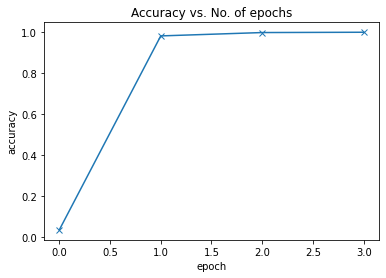

In [43]:
plot_accuracies(history)

## **Plot the losses by calling `plot_losses()` on the history.**

In [44]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

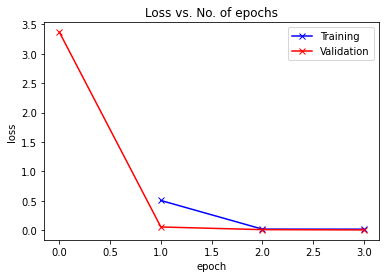

In [45]:
plot_losses(history)

## **Test with Randomly Chosen Individual Images**

In [50]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [49]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

In [51]:
# generate random integer values for selecting random valid_ds images
from random import randint

Target: Y
Prediction: Y
i:  172


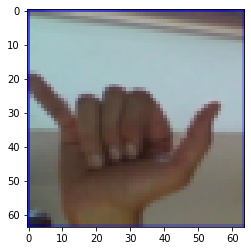

In [52]:
i = randint(0, ((len(valid_ds)) - 1))
show_image_prediction(*valid_ds[i])
print("i: ", i)

Target: V
Prediction: V
i:  2365


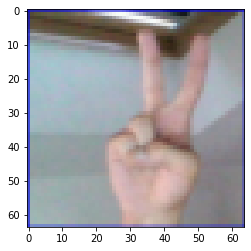

In [53]:
i = randint(0, ((len(valid_ds)) - 1))
show_image_prediction(*valid_ds[i])
print("i: ", i)

Target: V
Prediction: V
i:  6465


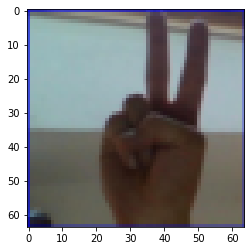

In [54]:
i = randint(0, ((len(valid_ds)) - 1))
show_image_prediction(*valid_ds[i])
print("i: ", i)

In [47]:
model_save_name = 'asl_99.94.pth'
path = F"./{model_save_name}" 
torch.save(model.state_dict(), path)